# Combine Features by PCA

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from load_data import *

In [5]:
wrangler = Wrangler()
url_listing = "http://data.insideairbnb.com/ireland/leinster/dublin/2021-11-07/data/listings.csv.gz"
listings = pd.read_csv(url_listing)

# remove extreme prices
price = listings["price"]
price = price.str.replace("$","")
price = price.str.replace(",","")
price = price.astype(float)
filter = price < 500
listings = listings[filter]

X_train, y_train = wrangler.fit_transform_dendro(listings)

------------------------------
Fit and Transform data...
------------------------------
58 amenities have been removed due to close zero-variance.
Text, OpenStreet and image data loaded.
61 binary variables have been removed due to close zero-variance.
Imputation done. No NaN's are left in the data.
Due to insignificant t-tests we drop:
['host_is_superhost', 'Extra pillows and blankets', 'Luggage dropoff allowed', 'Free_parking', 'host_name_sounds_west', 'host_name_sounds_rare', 'host_location_country_Ireland', 'neighbourhood_cleansed_Dn Laoghaire-Rathdown']


## City Life

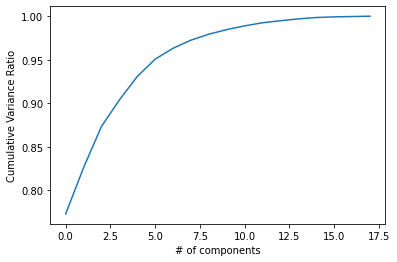

<Figure size 2880x2880 with 0 Axes>

In [28]:
city_life = ["nightclubs", "sex_amenities", "bicycle_rentals", "casinos", "university", "kiosks",
                 "theatres_artscentre", "library", "taxi", "fast_foods", "restaurants", "bars",
                 "cafes", "malls", "cinemas", "supermarkets", "bus_train_tram_station", "social_amenities"]

city_life_df = X_train[city_life]

pca = PCA().fit(city_life_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(40,40))
plt.show()

In [29]:
np.cumsum(pca.explained_variance_ratio_) #5

array([0.77290961, 0.82609065, 0.8733894 , 0.90384688, 0.93081577,
       0.95070523, 0.96327686, 0.97252827, 0.97942242, 0.98464349,
       0.98894991, 0.99251785, 0.99483177, 0.99696376, 0.99854196,
       0.99928114, 0.99967247, 1.        ])

## Travel & Touristic 

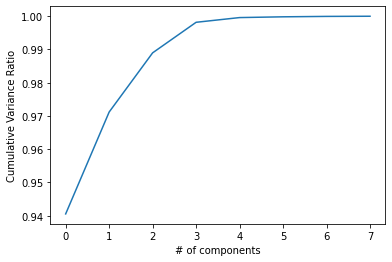

<Figure size 720x720 with 0 Axes>

In [30]:
travel_touristic = ["neighbourhood_cleansed_Dublin_City", "in_city", "nearest_sight", "mean_dist_sight", 
                    "2nd_nearest_sight", "3rd_nearest_sight", "nearest_travel_poss", "mean_dist_travel"]

travel_touristic_df = X_train[travel_touristic]

pca = PCA().fit(travel_touristic_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [32]:
np.cumsum(pca.explained_variance_ratio_)

array([0.94052697, 0.97117774, 0.98898824, 0.99818044, 0.9995991 ,
       0.99982874, 0.99995272, 1.        ])

## Kitchen Equipment

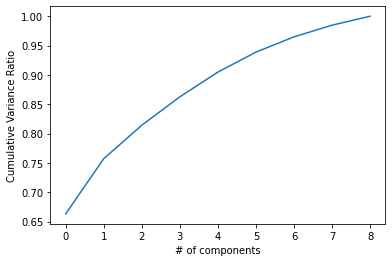

<Figure size 2880x2880 with 0 Axes>

In [69]:
kitchen = ["Microwave", "Dishes_and_silverware", "Refridgerator_available", "Dishwasher",
           "Stoves_available", "Cooking_basics", "Oven_available", "Kitchen_available",
           "Hot_water"]
# 5

kitchen_equip_df = X_train[kitchen]

pca = PCA().fit(kitchen_equip_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(40,40))
plt.show()

In [64]:
kitchen_equip_df.corr()

,Microwave,Dishes_and_silverware,Refridgerator_available,Dishwasher,Stoves_available,Cooking_basics,Oven_available
Microwave,1.000000,0.753886,0.810995,0.577065,0.636251,0.687900,0.756831
Dishes_and_silverware,0.753886,1.000000,0.838104,0.570825,0.685908,0.777677,0.778904
Refridgerator_available,0.810995,0.838104,1.000000,0.613942,0.718398,0.770542,0.836243
Dishwasher,0.577065,0.570825,0.613942,1.000000,0.527562,0.545710,0.648270
Stoves_available,0.636251,0.685908,0.718398,0.527562,1.000000,0.699347,0.781807
Cooking_basics,0.687900,0.777677,0.770542,0.545710,0.699347,1.000000,0.808789
Oven_available,0.756831,0.778904,0.836243,0.648270,0.781807,0.808789,1.000000


In [70]:
np.cumsum(pca.explained_variance_ratio_)

array([0.66315227, 0.75725923, 0.81423072, 0.86261536, 0.90475324,
       0.93884381, 0.96485467, 0.98475115, 1.        ])

## Accommodation Size

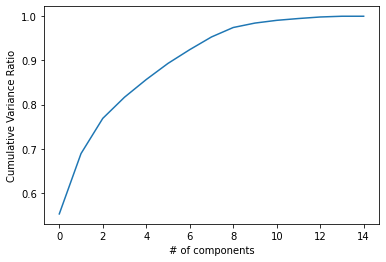

<Figure size 720x720 with 0 Axes>

In [49]:
# acco = ["bedrooms_1", "bedrooms_2", "accommodates", "beds", "room_type_Entire home/apt", "room_type_Private room",
#                      "bath_number_1", "bath_number_2", "bath_kind_Shared", "bath_kind_Private", "bath_kind_Normal",
#                      "property_type_Entire_residential home", "property_type_Entire rental unit", "property_type_Others"]

acco = ["room_type_Private_room", "room_type_Entire_home/apt", 
        "bath_number_1", "bath_number_2", "bath_kind_Shared", "bath_kind_Private", "bath_kind_Normal",
        "bedrooms_1", "bedrooms_2", "accommodates", "beds", 
        "property_type_Private_room_in_residential_home", "property_type_Entire_rental_unit",
        "property_type_Private_room_in_rental_unit", "property_type_Entire_residential_home"]

accommodation_size_df = X_train[acco]

pca = PCA().fit(accommodation_size_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [50]:
np.cumsum(pca.explained_variance_ratio_)

array([0.55222053, 0.68897089, 0.76862679, 0.81659217, 0.85665651,
       0.89318331, 0.92433233, 0.95307369, 0.97446809, 0.98453556,
       0.99072023, 0.99482443, 0.99830877, 1.        , 1.        ])

In [84]:
# 6 Components

## Host Listings count

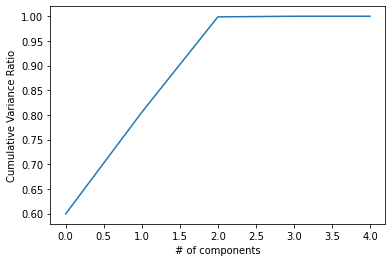

<Figure size 720x720 with 0 Axes>

In [39]:
host_listings = ["calculated_host_listings_count", "host_listings_count", "calculated_host_listings_count_private_rooms",
                 "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_shared_rooms"]

host_listings_df = X_train[host_listings]

pca = PCA().fit(host_listings_df)
r_cs = np.cumsum(pca.explained_variance_ratio_)
#r_cs = np.round(r_cs)
plt.plot(r_cs)
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

## Minimum nights

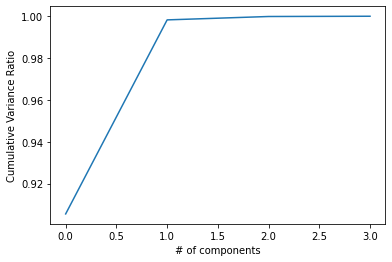

<Figure size 720x720 with 0 Axes>

In [40]:
min_nights = ["minimum_nights", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_nights_avg_ntm"]

min_nights_df = X_train[min_nights]

pca = PCA().fit(min_nights_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

## Availability

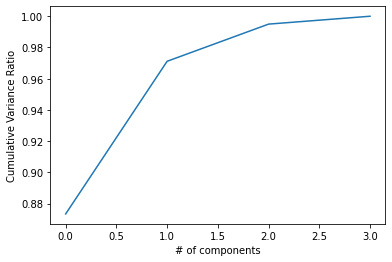

<Figure size 720x720 with 0 Axes>

In [41]:
avail = ["availability_365", "availability_30", "availability_60", "availability_90"]

avail_df = X_train[avail]

pca = PCA().fit(avail_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

## Review total

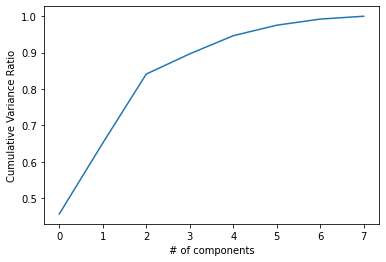

<Figure size 720x720 with 0 Axes>

In [42]:
review_total =  ["review_scores_rating", "mean_compound", "most_pos_compound", "mean_positivity",
                 "mean_neutrality", "mean_negativity", "prop_of_neg_comp", "mean_review_length"]  #  "most_neg_compound", 

review_total_df = X_train[review_total]

pca = PCA().fit(review_total_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

## Review Scores

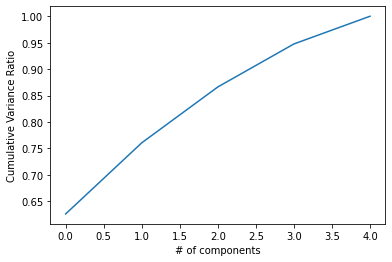

<Figure size 720x720 with 0 Axes>

In [90]:
review_scores = ["review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_cleanliness",
                 "review_scores_value"]

review_scores_df = X_train[review_scores]

pca = PCA().fit(review_scores_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [91]:
# not so nice

## Maximum Nights

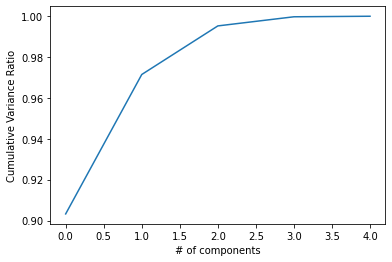

<Figure size 720x720 with 0 Axes>

In [43]:
max_nights = ["maximum_nights", "minimum_maximum_nights", "maximum_maximum_nights", "maximum_nights_avg_ntm", "Long_term_stays_allowed"]


max_nights_df = X_train[max_nights]

pca = PCA().fit(max_nights_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

## Number of reviews on time

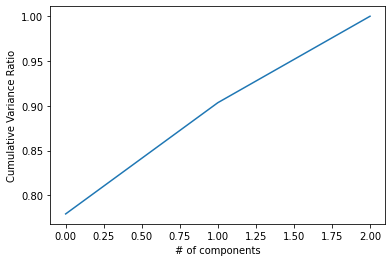

<Figure size 720x720 with 0 Axes>

In [44]:

review_amount = ["number_of_reviews_l30d", "number_of_reviews_ltm", "reviews_per_month"]

review_amount_df = X_train[review_amount]

pca = PCA().fit(review_amount_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

## Host About

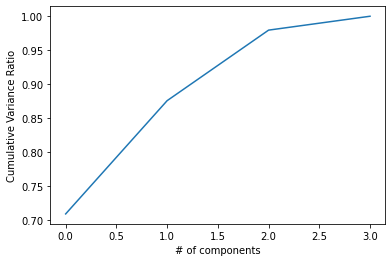

<Figure size 720x720 with 0 Axes>

In [45]:
host_ab = ["compound_host_ab", "positivity_host_ab", "host_about_length", "neutrality_host_ab"]

host_ab_df = X_train[host_ab]

pca = PCA().fit(host_ab_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

## Neighborhood Overview

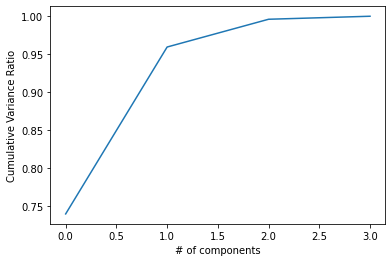

<Figure size 720x720 with 0 Axes>

In [46]:
neigh_over = ["compound_neigh_over", "positivity_neigh_over", "neighborhood_overview_length", "neutrality_neigh_over"]

neigh_over_df = X_train[neigh_over]

pca = PCA().fit(neigh_over_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

## Description

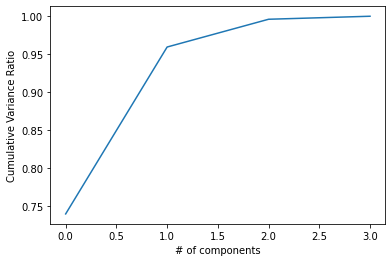

<Figure size 720x720 with 0 Axes>

In [47]:
descr = ["compound_descr", "positivity_descr", "description_length", "neutrality_descr"]

descr_df = X_train[descr]

pca = PCA().fit(neigh_over_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

## Number of Images

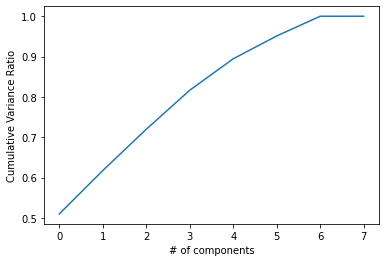

<Figure size 720x720 with 0 Axes>

In [48]:
img_no = ["no_img_others", "no_img_hallway", "no_img_dining", "no_img_bathroom", "count", 
          "no_img_bedroom", "no_img_kitchen", "no_img_living"]

img_no_df = X_train[img_no]

pca = PCA().fit(img_no_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of components")
plt.ylabel("Cumulative Variance Ratio")
plt.figure(figsize=(10,10))
plt.show()

In [98]:
# 5 components

In [99]:
accommodation_size_df @ pca.components_.transpose()

ValueError: Dot product shape mismatch, (4928, 14) vs (8, 8)